## Visualize results NARMAX experiments

In [29]:
using Revise
using JLD
using MAT
using Statistics
using StatsPlots
using LaTeXStrings
using Plots
pyplot();

In [30]:
include("visualization.jl");

In [31]:
alpha = 0.1
linewidth = 2;
styles = [:solid, :dash, :dot, :dashdot];

### Experiment

In [32]:
NR = 50

NT = [100, 200, 400, 800, 1600]
NE = length(NT)

deg = 3
order = 10

results_sim_FEM = zeros(NE,2)
results_prd_FEM = zeros(NE,2)
results_sim_RLS = zeros(NE,2)
results_prd_RLS = zeros(NE,2)
results_sim_KLS = zeros(NE,2)
results_prd_KLS = zeros(NE,2)
avg_FE = zeros(NE,2)
fin_FE = zeros(NE,2)

RMS_sim_FEM = zeros(NR,NE)
RMS_prd_FEM = zeros(NR,NE)
RMS_sim_RLS = zeros(NR,NE)
RMS_prd_RLS = zeros(NR,NE)
RMS_sim_KLS = zeros(NR,NE)
RMS_prd_KLS = zeros(NR,NE)
avg_FE_r = zeros(NR,NE)
fin_FE_r = zeros(NR,NE)

for r = 1:NR

    # Load
    FEM_data = load("results/results-NARMAX_FEM_M"*string(order)*"_degree"*string(deg)*"_r"*string(r)*".jld")
    RMS_prd_FEM[r,:] = FEM_data["RMS_prd"]
    RMS_sim_FEM[r,:] = FEM_data["RMS_sim"]
    avg_FE_r[r,:] = FEM_data["avg_FE"]
    fin_FE_r[r,:] = FEM_data["fin_FE"]

    RLS_data = load("results/results-NARMAX_RLS_M"*string(order)*"_degree"*string(deg)*"_r"*string(r)*".jld")
    RMS_prd_RLS[r,:] = RLS_data["RMS_prd"]
    RMS_sim_RLS[r,:] = RLS_data["RMS_sim"]

    KLS_data = matread("results/results-NARMAX_KLS_M"*string(order)*"_degree"*string(deg)*"_r"*string(r)*".mat")
    RMS_prd_KLS[r,:] = KLS_data["RMS_prd"]
    RMS_sim_KLS[r,:] = KLS_data["RMS_sim"]

end    
    
# Check for proportion of instable
instab_sim_FEM = mean(isnan.(RMS_sim_FEM),dims=1)
instab_prd_FEM = mean(isnan.(RMS_prd_FEM),dims=1)
instab_sim_RLS = mean(isnan.(RMS_sim_RLS),dims=1)
instab_prd_RLS = mean(isnan.(RMS_prd_RLS),dims=1)
instab_sim_KLS = mean(isnan.(RMS_sim_KLS),dims=1)
instab_prd_KLS = mean(isnan.(RMS_prd_KLS),dims=1)

# Populate RMS array
for n = 1:NE
    results_sim_FEM[n,1] = tmean(filter(!isnan, RMS_sim_FEM[:,n]), tr=0.05)
    results_sim_FEM[n,2] = trimse(filter(!isnan, RMS_sim_FEM[:,n]), tr=0.05)
    results_prd_FEM[n,1] = tmean(filter(!isnan, RMS_prd_FEM[:,n]), tr=0.05)
    results_prd_FEM[n,2] = trimse(filter(!isnan, RMS_prd_FEM[:,n]), tr=0.05)

    results_sim_RLS[n,1] = tmean(filter(!isnan, RMS_sim_RLS[:,n]), tr=0.05)
    results_sim_RLS[n,2] = trimse(filter(!isnan, RMS_sim_RLS[:,n]), tr=0.05)
    results_prd_RLS[n,1] = tmean(filter(!isnan, RMS_prd_RLS[:,n]), tr=0.05)
    results_prd_RLS[n,2] = trimse(filter(!isnan, RMS_prd_RLS[:,n]), tr=0.05)

    results_sim_KLS[n,1] = tmean(filter(!isnan, RMS_sim_KLS[:,n]), tr=0.05)
    results_sim_KLS[n,2] = trimse(filter(!isnan, RMS_sim_KLS[:,n]), tr=0.05)
    results_prd_KLS[n,1] = tmean(filter(!isnan, RMS_prd_KLS[:,n]), tr=0.05)
    results_prd_KLS[n,2] = trimse(filter(!isnan, RMS_prd_KLS[:,n]), tr=0.05)
end

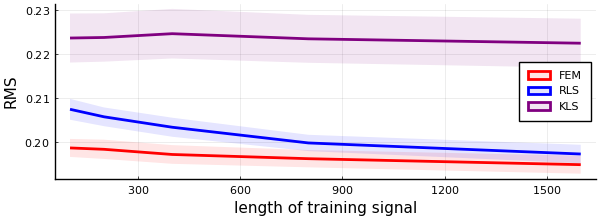

In [46]:
p6 = plot(NT, results_sim_FEM[:,1], 
          ribbon=[results_sim_FEM[:,2] results_sim_FEM[:,2]], 
          color="red", 
          label="FEM", 
#           xscale=:log10,
#           yscale=:log10,
#           ylims=[0.00, 0.016],
          linewidth=linewidth,
          fillalpha=alpha,
#           title="Simulation error",
          xlabel="length of training signal",
          ylabel="RMS",
          size=(600,220))
plot!(NT, results_sim_RLS[:,1], 
     ribbon=[results_sim_RLS[:,2] results_sim_RLS[:,2]], 
     color="blue", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="RLS")
plot!(NT, results_sim_KLS[:,1], 
     ribbon=[results_sim_KLS[:,2] results_sim_KLS[:,2]], 
     color="purple", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="KLS")

In [44]:
savefig(p6, "figures/NARMAX-RMS-sim_deg"*string(deg)*"_order"*string(order)*".png")

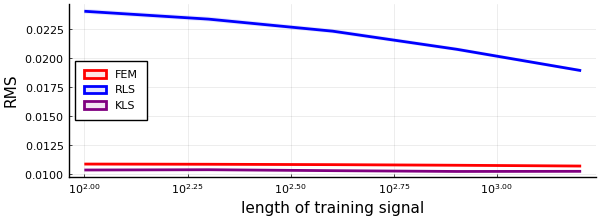

In [47]:
p7 = plot(NT, results_prd_FEM[:,1], 
          ribbon=[results_prd_FEM[:,2] results_prd_FEM[:,2]], 
          color="red", 
          label="FEM", 
          xscale=:log10,
#           yscale=:log10,
#           ylims=[0.00, 0.016],
          linewidth=linewidth,
          fillalpha=alpha,
          xlabel="length of training signal",
          ylabel="RMS",
          size=(600,220))
plot!(NT, results_prd_RLS[:,1], 
     ribbon=[results_prd_RLS[:,2] results_prd_RLS[:,2]], 
     color="blue", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="RLS")
plot!(NT, results_prd_KLS[:,1], 
     ribbon=[results_prd_KLS[:,2] results_prd_KLS[:,2]], 
     color="purple", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="KLS")

In [40]:
savefig(p7, "figures/NARMAX-RMS-prd_deg"*string(deg)*"_order"*string(order)*".png")